## Aluno: Lucas Barbosa dos Santos

##Atividade:
Utilizando como base o código
4.2-Iris-dataset-2-ou-mais-camadas-fronteira-dinamica.ipynb, faça as
atividades e responda as perguntas abaixo. Para submissão, submeta sua
resposta no repositório criado para a disciplina.

Coloque o resultado dentro de uma pasta chamada "Atividade Aula 4.2".


1. Faça alterações na rede, alterando o número de neurônios, de camadas. Escreva suas conclusões.
2. No lugar da ReLU, coloque Sigmoid e observe a diferença. O que aconteceu? Descreva.
3. O que ocorre quando não se utiliza ativação não linear entre camadas?

In [48]:
%matplotlib inline
from sklearn import datasets
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable
import torch.nn as nn

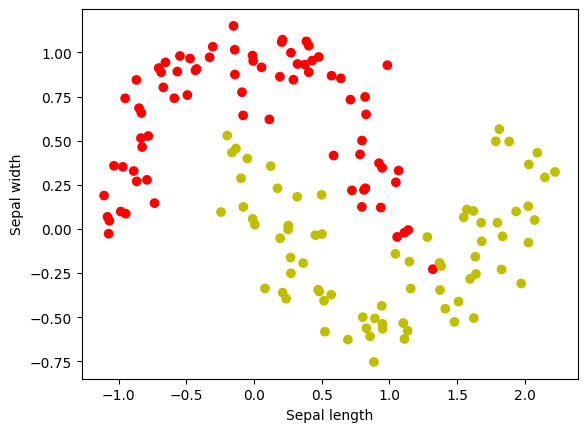

In [49]:
n_samples = 150
options = ['iris', 'moon', 'circles', 'blobs']
option = options[1]
if option == 'iris':
    iris = datasets.load_iris()
    X = iris.data[:,:2]  # comprimento das sépalas e pétalas, indices 0 e 2
    Xc = X - X.min(axis=0)
    Xc /= Xc.max(axis=0)
    Y = iris.target
elif option == 'moon':
    Xc,Y = datasets.make_moons(n_samples=n_samples, noise=.15)
elif option == 'circles':
    Xc,Y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.1)
elif option == 'blobs':
    Xc,Y = datasets.make_blobs(n_samples=n_samples,centers=3,cluster_std=1.2)

colors = np.array(['r','y','b'])
plt.scatter(Xc[:, 0], Xc[:, 1], c=colors[Y])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

In [50]:
X_tensor = torch.FloatTensor(Xc)
Y_tensor = torch.LongTensor(Y)

In [51]:
def predict(model, inputs):
    outputs = model(Variable(inputs))
    _, predicts = torch.max(outputs, 1)

    return predicts.data.numpy()

In [52]:
class BoundaryPlotter():
    def __init__(self, model, X, Y, n_epoch, filepath=None, h = .01):
        self.model = model
        self.X = X
        self.Y = Y
        self.n_epoch = n_epoch
        self.filepath = filepath
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        self.xx, self.yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        self.loss_hist = []
        self.val_loss_hist = []
        self.X_grid = np.c_[self.xx.ravel(), self.yy.ravel()]

        #Gráficos a serem mostrados pelo callback
        self.fig = plt.figure(figsize=(8, 4), dpi=100)
        self.ax1 = self.fig.add_subplot(1, 2, 1)
        self.ax1.set_xlim(0, nb_epoch)
        self.ax1.set_xlabel('Epoca')#,fontsize=28)
        self.ax1.set_ylabel('Perda')#,fontsize=28)
        self.ax1.plot([],[],'b',linewidth = 2.0,label = "Treino")
        self.ax1.grid(True)

        self.ax2 = self.fig.add_subplot(1, 2, 2)
        self.ax2.set_xlim(Xc[:,0].min(), Xc[:,0].max())
        self.ax2.set_ylim(Xc[:,1].min(), Xc[:,1].max())
        self.ax2.set_xlabel('Comprimento da Sepala')#,fontsize=28)
        self.ax2.set_ylabel('Largura da Sepala')#,fontsize=28)

    def on_train_begin(self, logs={}):
        display.display(self.fig)
        display.clear_output(wait=True)

    def on_epoch_end(self, epoch, logs={}):
        if 'loss' in logs.keys():
            self.loss_hist.append(logs['loss'])

            if epoch%250==0:
                self.ax1.plot(np.arange(epoch+1), self.loss_hist, 'b', linewidth = 2.0)

                Z = predict(self.model, torch.from_numpy(self.X_grid).type(torch.FloatTensor))
#                 Z = torch.max(self.model(Variable(torch.FloatTensor(self.X_grid))).data, dim=1)[1].numpy()
                Z = Z.reshape(self.xx.shape)

                self.ax2.pcolormesh(self.xx, self.yy, Z, cmap=plt.cm.Paired)
                colors = np.array(['r','y','b'])
                self.ax2.scatter(self.X[:, 0], self.X[:, 1], s=40, c=colors[self.Y], edgecolors='k', cmap=plt.cm.Paired)

                display.display(self.fig)
                display.clear_output(wait=True)

In [53]:
# class Modelo(nn.Module):
#     def __init__(self):
#         super(Modelo, self).__init__()
#         self.dense = nn.Sequential(
#             nn.Linear(2, 5),
#             nn.ReLU(),
#             nn.Linear(5, 5),
#             nn.ReLU(),
#             nn.Linear(5,3),
#         )

#     def forward(self, x):
#         x = self.dense(x)

#         return x

# model = Modelo()
# print(model)

In [54]:
class Modelo(nn.Module):
    def __init__(self):
        super(Modelo, self).__init__()
        self.dense = nn.Sequential(
            nn.Linear(2, 10),  # Aumento para 10 neurônios na primeira camada
            nn.Sigmoid(),      # Usando Sigmoid em vez de ReLU
            nn.Linear(10, 20), # Aumento para 20 neurônios na segunda camada
            nn.Sigmoid(),      # Sigmoid novamente
            nn.Linear(20, 30), # Adicionando mais uma camada oculta com 30 neurônios
            nn.Sigmoid(),      # Sigmoid na terceira camada
            nn.Linear(30, 3),  # Camada de saída
        )

    def forward(self, x):
        x = self.dense(x)
        return x

# Instanciando e imprimindo a rede
model = Modelo()
print(model)

Modelo(
  (dense): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=10, out_features=20, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=20, out_features=30, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=30, out_features=3, bias=True)
  )
)


In [55]:
lr = 0.15

optimizer = torch.optim.SGD(model.parameters(), lr=lr)

criterion = nn.CrossEntropyLoss()

Final loss: tensor(0.3069)


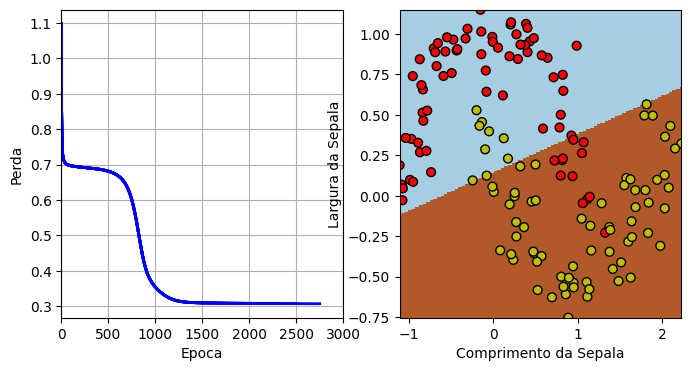

In [56]:
batch_size = 150
nb_epoch = 3000

#Definindo o plotter
boundary_plot = BoundaryPlotter(model, Xc, Y, nb_epoch)

boundary_plot.on_train_begin()
losses = []
for i in range(nb_epoch):
    # predict da rede
    output = model(Variable(X_tensor))

    loss = criterion(output, Variable(Y_tensor))

    # zero, backpropagation gradient, atualiza param gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.data)

    boundary_plot.on_epoch_end(i, {'loss': loss.data})

print('Final loss:', loss.data)

In [57]:
for name, w in model.state_dict().items():
    print('{:16}{}'.format(name, w.size()))
    print(w)

dense.0.weight  torch.Size([10, 2])
tensor([[ 0.1359, -0.6996],
        [-0.2917,  1.3597],
        [-0.3015,  1.3511],
        [ 0.1969, -0.4525],
        [ 0.3920, -1.4607],
        [ 0.4946, -0.1877],
        [ 0.1806, -1.3579],
        [ 0.3253, -0.3823],
        [-0.2608,  1.4699],
        [-0.3302,  0.8038]])
dense.0.bias    torch.Size([10])
tensor([-0.1575, -0.0665, -0.2852,  0.0523,  0.6118,  0.6326,  0.2822, -0.3069,
        -0.3555,  0.5541])
dense.2.weight  torch.Size([20, 10])
tensor([[ 3.6501e-01, -3.3365e-01, -3.9725e-01,  2.7558e-01,  1.8579e-01,
          2.4839e-01,  2.7036e-01,  2.0174e-01, -3.4242e-01,  1.0060e-01],
        [-4.7071e-01,  5.9162e-01,  4.0767e-01, -3.4616e-01, -6.1580e-01,
          3.5035e-03, -5.6122e-01,  1.1518e-01,  6.8414e-01,  1.4075e-01],
        [ 1.6497e-01, -3.9043e-01, -2.2016e-01,  3.7550e-02,  5.7297e-01,
         -1.3729e-01,  4.8247e-01,  3.5342e-01, -5.0186e-01, -3.2081e-01],
        [-2.7368e-01,  2.4093e-01,  1.9589e-01,  1.5416e-01

In [58]:
Y_hat = predict(model, X_tensor)
accuracy = (Y_hat == Y).mean()
print()
print('Training Accuracy: ', accuracy)


Training Accuracy:  0.8666666666666667


In [59]:
import pandas as pd
pd.crosstab(Y_hat, Y)

col_0,0,1
row_0,,
0,63,8
1,12,67


 Alterações no número de neurônios e camadas:
Mais neurônios e camadas podem aumentar a capacidade do modelo de aprender representações mais complexas dos dados.

Maior profundidade e mais neurônios geralmente resultam em um modelo com maior capacidade de aprender, mas também aumentam o risco de overfitting (sobretreinamento), especialmente se o número de amostras de treino não for grande o suficiente.

2. Alteração de ReLU para Sigmoid:
ReLU (Rectified Linear Unit) é uma função de ativação que retorna 0 para entradas negativas e a entrada original para entradas positivas. Isso permite evitar o problema de gradientes desaparecendo durante o treinamento (com valores negativos "mortos").

Sigmoid retorna valores entre 0 e 1, o que pode "comprimir" as ativações e fazer com que o modelo tenha dificuldade em aprender (principalmente em redes profundas) devido ao problema de gradientes que desaparecem (vanishing gradients).

O que aconteceu?

Quando usamos Sigmoid em vez de ReLU, a rede pode ter dificuldade em aprender, especialmente para camadas mais profundas, já que os gradientes tendem a diminuir muito à medida que se retropropagam, fazendo com que o aprendizado seja mais lento ou até estagnado.

ReLU permite gradientes mais fortes para as entradas positivas, o que facilita o treinamento e acelera a convergência, tornando o modelo mais eficiente.

3. O que ocorre quando não se utiliza ativação não linear entre camadas?
Quando não usamos funções de ativação não lineares entre as camadas, o modelo se torna uma composição de funções lineares. Isso significa que, não importa quantas camadas o modelo tenha, ele pode ser reduzido a uma única transformação linear. Em outras palavras, a rede neural não será capaz de modelar funções complexas, porque funções lineares compostas são ainda funções lineares.

Conclusão: Sem ativação não linear, a rede não terá capacidade de aprender padrões não lineares complexos, e seu desempenho será muito limitado. A ativação não linear é crucial para dar "potência" à rede, permitindo que ela aprenda padrões mais complexos.